# 다음 분기에 어떤 게임을 설계해야 할까

## 핵심 주제
### 1. 지역에 따라서 선호하는 게임 장르가 다를까

### 2. 연도별 게임의 트렌드가 있을까

### 3. 인기가 많은 게임에 대한 분석 및 시각화 프로세스

### 4. 다음 분기에 어떤 게임을 설계해야 하는지에 대한 결론

## 1) EDA

## Data Description
Name : 게임의 이름입니다.

Platform : 게임이 지원되는 플랫폼의 이름입니다.

Year : 게임이 출시된 연도입니다.

Genre : 게임의 장르입니다.

Publisher : 게임을 배급한 회사입니다.

NA_Sales : 북미지역에서의 출고량입니다.

EU_Sales : 유럽지역에서의 출고량입니다.

JP_Sales : 일본지역에서의 출고량입니다.

Other_Sales : 기타지역에서의 출고량입니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
import seaborn as sns

df = pd.read_csv('/Users/seongjinhyeon/Desktop/codestatesJinHyen/Section1 Project/vgames2.csv', index_col = 0)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


## 중복데이터 제거

In [3]:
df.loc[df.duplicated(keep = False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8056,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0
9185,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0


In [4]:
df.drop_duplicates(inplace = True)
df = df.reset_index(drop = True)

## 결측치 확인

### 결측치를 확인하기전에 이름이 같은것들이 있다는것을 확인하고 멀티플렛폼으로 같이 출시한 게임의 경우 이름과 연도 둘다 있는게 있지 않을까 싶어서 확인

In [5]:
df.isna().sum()

Name             0
Platform         0
Year           270
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [6]:
df_Y_isna = df.loc[df.Year.isna()]

In [7]:
df_Y_isna

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
358,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
430,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03
...,...,...,...,...,...,...,...,...,...
16239,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0,0,0
16274,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0M,0.03
16277,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0,0,50K
16424,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0


In [8]:
Name = df_Y_isna.Name.unique()
num = df_Y_isna.Name.nunique()

In [9]:
yesYear = df.copy()
yesYear = yesYear.dropna(subset = ['Year'])

have_Year = []

for data in yesYear['Name']:
    if data in Name:
        have_Year.append(data)

In [10]:
have_Year

['World of Tanks',
 'Madden NFL 07',
 'Madden NFL 07',
 'Shrek the Third',
 'Madden NFL 2002',
 'Space Invaders',
 'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
 'BioShock 2',
 'PES 2009: Pro Evolution Soccer',
 'FIFA Soccer 2004',
 'GRID',
 'Majesty 2: The Fantasy Kingdom Sim',
 'Shaun White Snowboarding',
 'Hitman 2: Silent Assassin',
 'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
 'Gun',
 'Shaun White Snowboarding',
 'Shrek the Third',
 'NASCAR Thunder 2003',
 'Danganronpa: Trigger Happy Havoc',
 'Madden NFL 06',
 'Madden NFL 2002',
 'LEGO Indiana Jones: The Original Adventures',
 'Madden NFL 06',
 'Final Fantasy XI',
 'Robotech: Battlecry',
 'Major League Baseball 2K6',
 'Transworld Surf',
 'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
 'Battle vs. Chess',
 'Namco Museum',
 'Jonah Lomu Rugby Challenge',
 'Madden NFL 11',
 'Rock Revolution',
 'Tomb Raider (2013)',
 'Bejeweled 3',
 'Madden NFL 2004',
 'Nicktoons: Battle for 

In [11]:
for i in have_Year:
    Year_data = df[df['Name'] == i]
    year_with_data = Year_data['Year'].dropna().iloc[0]
    df.loc[(df['Name'] == i) & (df['Year'].isnull()), 'Year'] = year_with_data

In [12]:
df.Year.isna().sum()

146

In [13]:
df_G_isna = df[df.Genre.isna()]
df_G_isna.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
50,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
408,NBA Ballers,XB,2004.0,NaN,Midway Games,0.37,0.11,0,0.02
1328,NFL Street,XB,2004.0,NaN,Electronic Arts,0.49,0.15,0,0.02
1582,SingStar Singalong With Disney,PS2,2008.0,NaN,Sony Computer Entertainment,0,0.04,0,0.57
1971,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5170K,4.05,4.34,0.79


In [14]:
Name_G = df_G_isna.Name.unique()

In [15]:
yesGenre = df.copy()
yesGenre = yesGenre.dropna(subset = ['Genre'])

have_Genre = []

for data in yesGenre['Name']:
    if data in Name_G:
        have_Year.append(data)
have_Genre

[]

In [16]:
df_P_isna = df[df.Publisher.isna()]
df_P_isna.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
272,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
1313,All Grown Up!: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,NaN,0.17,0.06,0,0
1560,Teenage Mutant Ninja Turtles: Game Boy Advance...,GBA,2004.0,Misc,NaN,0.12,0.04,0,0
1789,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.16,0.06,0,0
1879,Monster Hunter Frontier Online,PS3,2010.0,Role-Playing,NaN,0,0,0.05,0


In [17]:
Name_P = df_P_isna.Name.unique()

In [18]:
yesPublisher = df.copy()
yesPublisher = yesPublisher.dropna(subset = ['Publisher'])

have_Publisher = []

for data in yesPublisher['Name']:
    if data in Name_P:
        have_Year.append(data)
have_Publisher

[]

In [19]:
df.isna().sum()

Name             0
Platform         0
Year           146
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [20]:
df['Genre'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
16592    False
16593    False
16594    False
16595    False
16596    False
Name: Genre, Length: 16597, dtype: bool

In [21]:
All_na = (df['Name'].isna() & df['Publisher'].isna() & df['Genre'].isna())
df[All_na]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


### 위에서 확인해본 결과 같은것을 찾기가 어렵다고 보아 제거하기로 결정했습니다.

In [22]:
df.dropna(inplace = True)

In [23]:
df.isna().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

## 나머지 데이터 확인

In [24]:
df.Year.value_counts()

2008.0    1427
2009.0    1422
2010.0    1260
2007.0    1197
2011.0    1139
          ... 
13.0         2
12.0         2
86.0         1
2020.0       1
94.0         1
Name: Year, Length: 62, dtype: int64

In [25]:
df.Year[df.Year < 1900].value_counts()

9.0     10
11.0    10
8.0     10
6.0      8
10.0     7
3.0      7
16.0     5
15.0     5
5.0      4
4.0      4
95.0     4
0.0      3
2.0      3
96.0     3
7.0      3
98.0     3
14.0     2
97.0     2
13.0     2
1.0      2
12.0     2
86.0     1
94.0     1
Name: Year, dtype: int64

### Year데이터에 1900보다 낮은걸 찾아보니 저런식으로 나왔다.
##### 20보다 작은수는 2000을 더해주고 20보다 큰데이터는 1900을 더해주기로 했다.

In [26]:
df.Year[df.Year < 1900] = df.Year[df.Year < 1900].apply(lambda x: x + 2000 if x < 20 else x + 1900)

/var/folders/q8/mp96_1x96_s14zl0lcj4p_xm0000gn/T/ipykernel_1012/1526790533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Year[df.Year < 1900] = df.Year[df.Year < 1900].apply(lambda x: x + 2000 if x < 20 else x + 1900)


In [27]:
df.Year[df.Year < 1900].value_counts()

Series([], Name: Year, dtype: int64)

In [28]:
df.Year.value_counts()

2008.0    1437
2009.0    1432
2010.0    1267
2007.0    1200
2011.0    1149
2006.0    1017
2005.0     943
2002.0     841
2003.0     783
2004.0     742
2012.0     660
2015.0     611
2014.0     580
2013.0     549
2001.0     484
1998.0     377
2000.0     348
2016.0     342
1999.0     338
1997.0     289
1996.0     262
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       8
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [29]:
df.loc[df.Year == 2020, 'Year'] = 2009

In [30]:
df.Year.value_counts()

2008.0    1437
2009.0    1433
2010.0    1267
2007.0    1200
2011.0    1149
2006.0    1017
2005.0     943
2002.0     841
2003.0     783
2004.0     742
2012.0     660
2015.0     611
2014.0     580
2013.0     549
2001.0     484
1998.0     377
2000.0     348
2016.0     342
1999.0     338
1997.0     289
1996.0     262
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       8
2017.0       3
Name: Year, dtype: int64

In [31]:
df.Year = df.Year.astype('int')

## 나라 출고량에 문자열이 있는것을 확인

In [32]:
df['EU_Sales'].value_counts()

0        5571
0.01     1456
0.02     1238
0.03      912
0.04      726
         ... 
1.88        1
8.89        1
2.93M       1
2130K       1
7.06        1
Name: EU_Sales, Length: 360, dtype: int64

In [33]:
sales_col = df.columns[5:]
sales_col

Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], dtype='object')

In [34]:
for col in sales_col:
  counts = df[col].str.extract('([a-zA-Z])', expand = False).value_counts()
  print('column : {0}\n{1}\n'.format(col, counts))

column : NA_Sales
M    98
K    96
Name: NA_Sales, dtype: int64

column : EU_Sales
K    99
M    98
Name: EU_Sales, dtype: int64

column : JP_Sales
M    99
K    98
Name: JP_Sales, dtype: int64

column : Other_Sales
M    100
K     98
Name: Other_Sales, dtype: int64



## 단위로 표시되어있는것들을 제거하고 단위를 맞춰주기로 결정했습니다.
### M은 제거만 하고 K는 1000을 나눠주기로 결정

### sales_col = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

In [35]:
df_clean = df.copy()

In [36]:
import re

for col in sales_col:
    sales_k = df_clean[col].str.extract('([a-zA-Z])', expand = False) == 'K'
    sales_m = df_clean[col].str.extract('([a-zA-Z])', expand = False) == 'M'
    
    df_clean[col][sales_k] = df_clean[col][sales_k].apply(lambda k: re.sub('([a-zA-Z])', '', k)).astype(float)
    df_clean[col][sales_k] = df_clean[col][sales_k] / 1000
    df_clean[col][sales_m] = df_clean[col][sales_m].apply(lambda m: re.sub('([a-zA-Z])', '', m)).astype(float)
    
    df_clean[col] = df_clean[col].astype(float)

/var/folders/q8/mp96_1x96_s14zl0lcj4p_xm0000gn/T/ipykernel_1012/728588617.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col][sales_k] = df_clean[col][sales_k].apply(lambda k: re.sub('([a-zA-Z])', '', k)).astype(float)
/var/folders/q8/mp96_1x96_s14zl0lcj4p_xm0000gn/T/ipykernel_1012/728588617.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col][sales_k] = df_clean[col][sales_k] / 1000
/var/folders/q8/mp96_1x96_s14zl0lcj4p_xm0000gn/T/ipykernel_1012/728588617.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

In [37]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16359 entries, 0 to 16596
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16359 non-null  object 
 1   Platform     16359 non-null  object 
 2   Year         16359 non-null  int64  
 3   Genre        16359 non-null  object 
 4   Publisher    16359 non-null  object 
 5   NA_Sales     16359 non-null  float64
 6   EU_Sales     16359 non-null  float64
 7   JP_Sales     16359 non-null  float64
 8   Other_Sales  16359 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.8+ MB


## 장르 정리

In [38]:
df_clean.Genre.value_counts()

Action          3276
Sports          2325
Misc            1694
Role-Playing    1467
Shooter         1293
Adventure       1269
Racing          1229
Platform         873
Simulation       849
Fighting         840
Strategy         674
Puzzle           570
Name: Genre, dtype: int64

In [39]:
df = df_clean

## 음... 굳이 안해도 될것 같았다. 비슷한장르가 있긴한데 전체적으로 너무 적은것도 없고 그대로 사용해도 문제는 없을거 같다.

# 1. 지역에 따라서 선호하는 게임 장르가 다를까

In [40]:
df.groupby('Genre').sum()['NA_Sales']

Genre
Action          869.47
Adventure       101.79
Fighting        221.04
Misc            396.87
Platform        445.38
Puzzle          122.17
Racing          355.74
Role-Playing    318.84
Shooter         580.02
Simulation      181.88
Sports          677.77
Strategy         68.20
Name: NA_Sales, dtype: float64

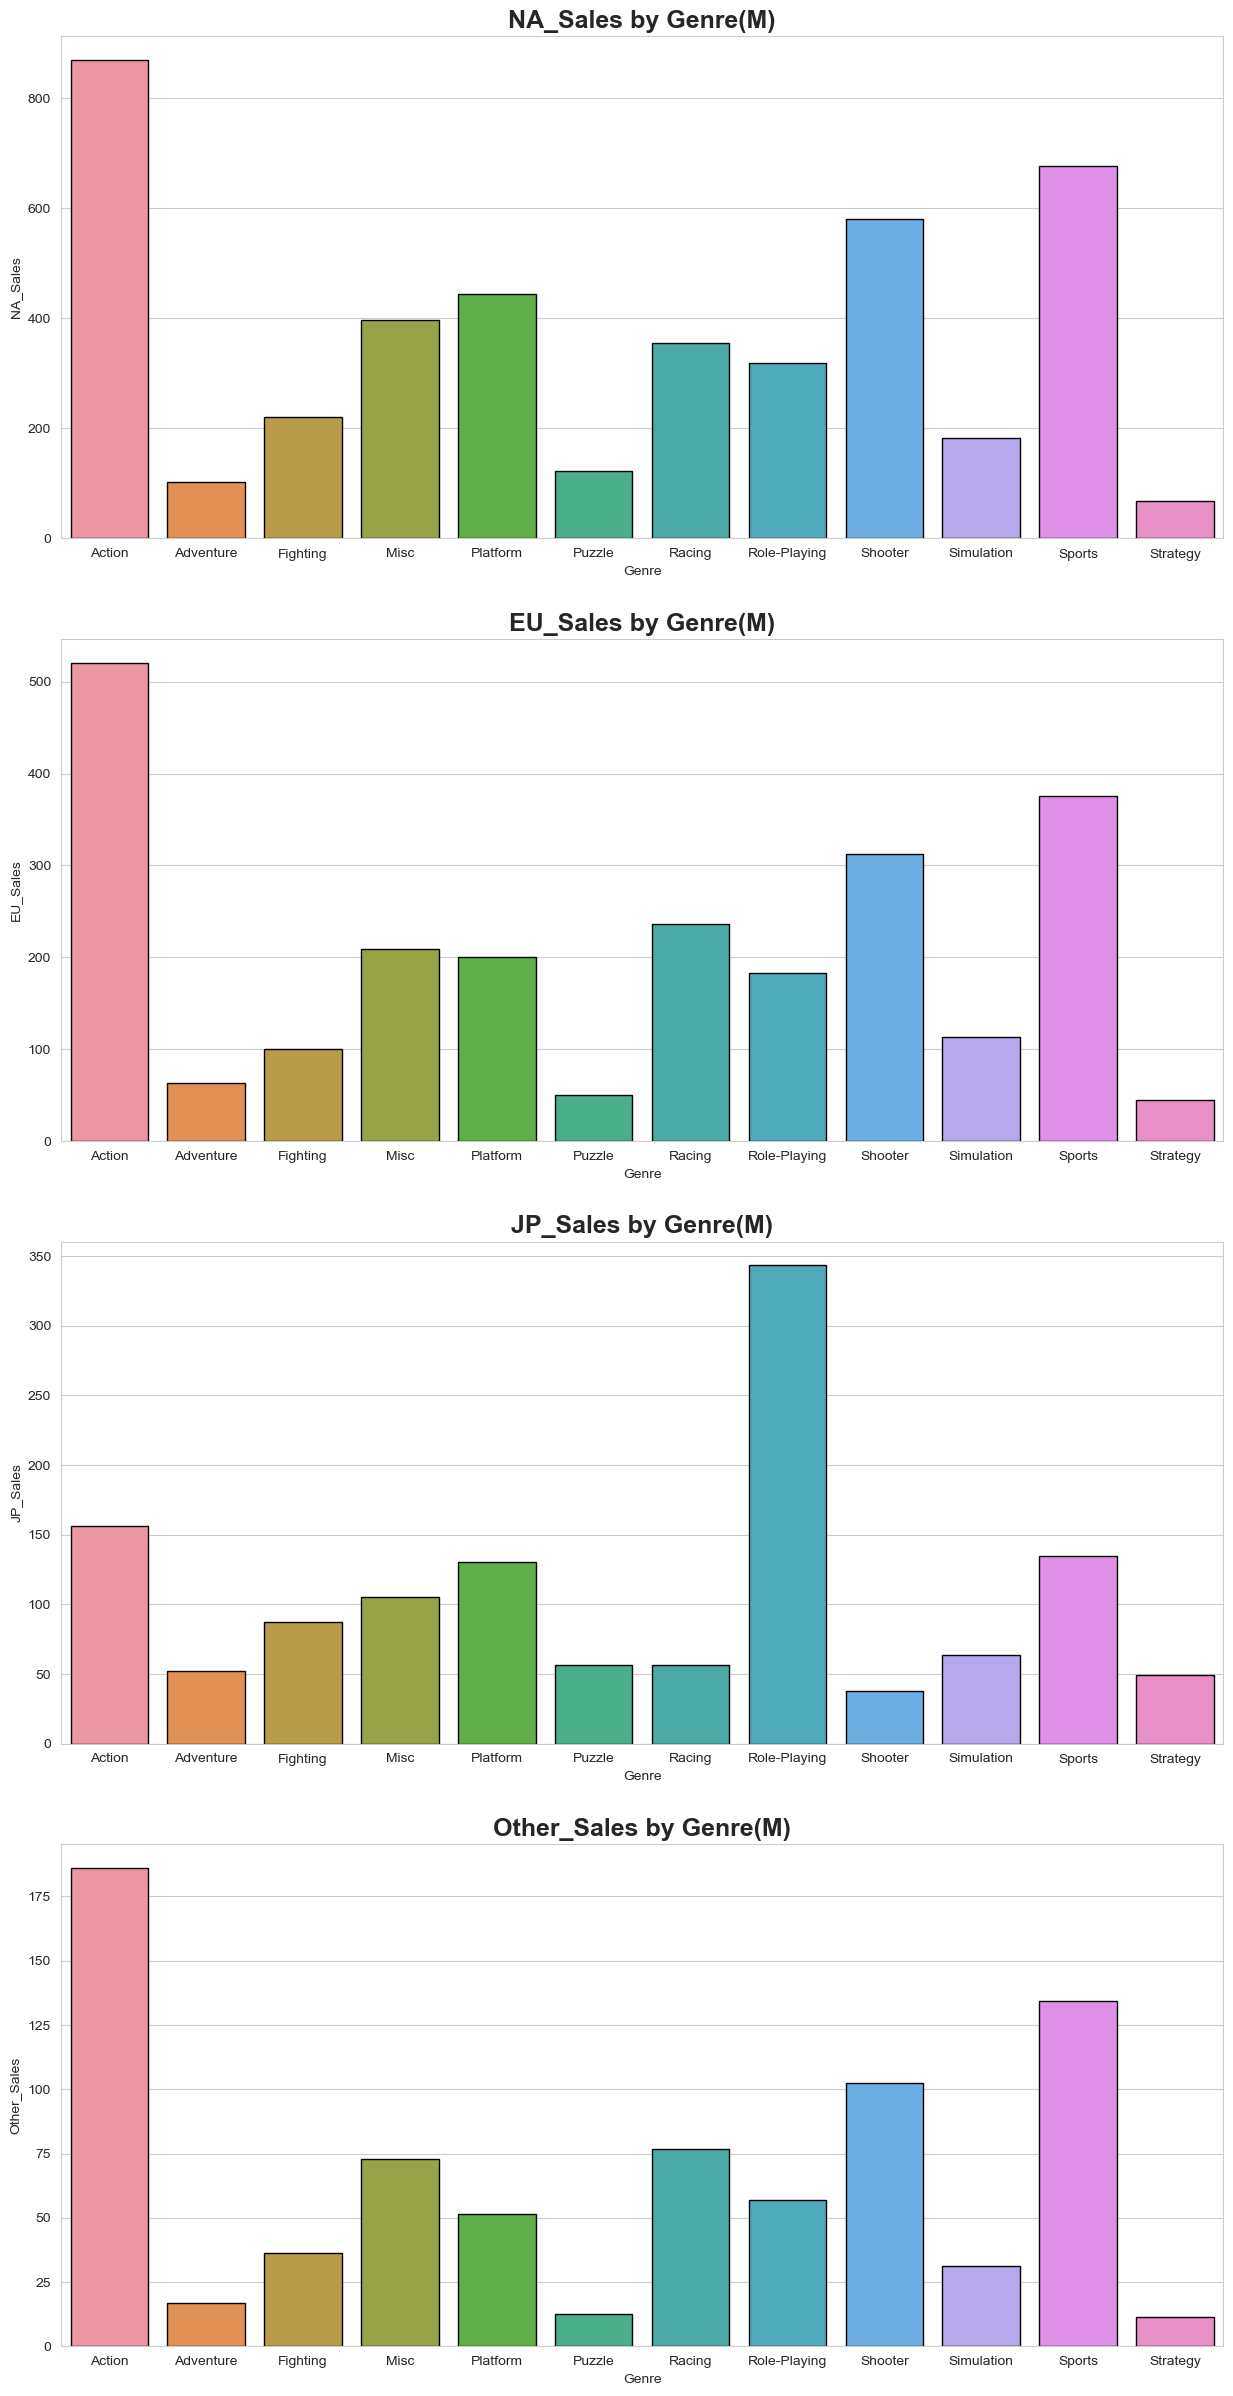

In [41]:
GNA = pd.DataFrame(df.groupby('Genre').sum()['NA_Sales'])
GNA = GNA.reset_index()
GEU = pd.DataFrame(df.groupby('Genre').sum()['EU_Sales'])
GEU = GEU.reset_index()
GJP = pd.DataFrame(df.groupby('Genre').sum()['JP_Sales'])
GJP = GJP.reset_index()
GOS = pd.DataFrame(df.groupby('Genre').sum()['Other_Sales'])
GOS = GOS.reset_index()

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')
fig = plt.figure(figsize = (15, 30))
ax01 = fig.add_subplot(4, 1, 1)
ax01.set_title('NA_Sales by Genre(M)', fontweight = 'bold', fontsize = 18)
ax02 = fig.add_subplot(4, 1, 2)
ax02.set_title('EU_Sales by Genre(M)', fontweight = 'bold', fontsize = 18)
ax03 = fig.add_subplot(4, 1, 3)
ax03.set_title('JP_Sales by Genre(M)', fontweight = 'bold', fontsize = 18)
ax04 = fig.add_subplot(4, 1, 4)
ax04.set_title('Other_Sales by Genre(M)', fontweight = 'bold', fontsize = 18)

sns.barplot(data = GNA, x = 'Genre', y = 'NA_Sales', ax = ax01, edgecolor = 'black')
sns.barplot(data = GEU, x = 'Genre', y = 'EU_Sales', ax = ax02, edgecolor = 'black')
sns.barplot(data = GJP, x = 'Genre', y = 'JP_Sales', ax = ax03, edgecolor = 'black')
sns.barplot(data = GOS, x = 'Genre', y = 'Other_Sales', ax = ax04, edgecolor = 'black')

plt.show()

In [42]:
AGS = pd.DataFrame(df.groupby('Genre').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']])
AGS

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,869.47,520.57,156.61,186.05
Adventure,101.79,63.68,51.87,16.70
Fighting,221.04,100.08,87.14,36.20
Misc,396.87,208.88,105.19,72.91
Platform,445.38,200.63,130.53,51.45
Puzzle,122.17,50.52,56.24,12.49
Racing,355.74,236.02,56.33,76.82
Role-Playing,318.84,183.15,343.37,56.79
Shooter,580.02,312.64,38.20,102.55


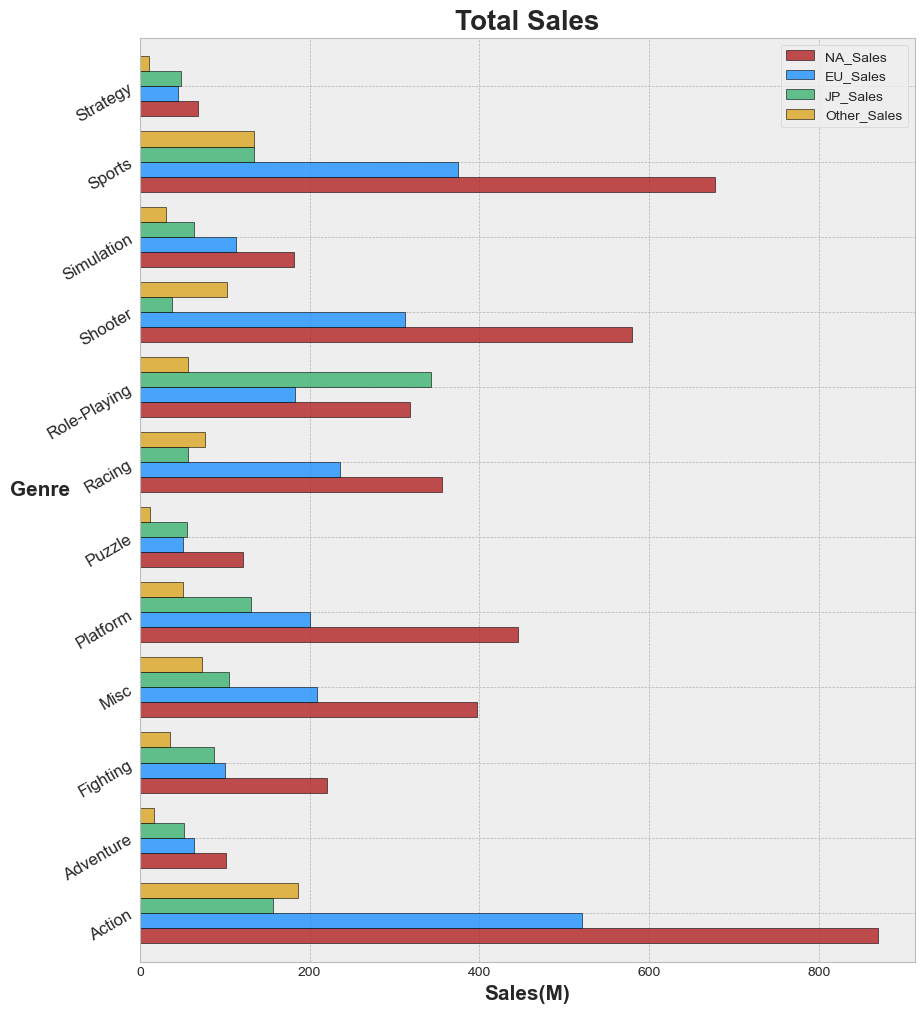

In [43]:
plt.figure(figsize=(10, 12))
plt.style.use('bmh')
color = ['firebrick', 'dodgerblue', 'mediumseagreen', 'goldenrod']
AGS.plot(kind = 'barh', ax = plt.gca(), color = color, edgecolor = 'black', alpha = 0.8, width = 0.8)
plt.yticks(fontsize = 12, rotation = 30)
plt.xlabel('Sales(M)', fontsize = 15, fontweight = 'bold')
plt.ylabel('Genre', fontsize = 15, fontweight = 'bold', rotation = 0)
plt.title('Total Sales', fontweight = 'bold', fontsize = 20)
plt.show()

## 통계 검정 카이제곱 검정사용

### 지역에 따라서 선호하는 게임 장르가 다를까
### 가설검정
#### 귀무가설 : 지역에 따라서 선호하는 게임장르가 비슷하다.
#### 대립가설 : 지역에 따라서 선호하는 게임장르가 다르다.

In [44]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

In [45]:
test1 = pd.DataFrame(df.groupby('Genre').sum()[['NA_Sales', 'EU_Sales']])
test2 = pd.DataFrame(df.groupby('Genre').sum()[['NA_Sales', 'JP_Sales']])
test3 = pd.DataFrame(df.groupby('Genre').sum()[['NA_Sales', 'Other_Sales']])
test4 = pd.DataFrame(df.groupby('Genre').sum()[['EU_Sales', 'JP_Sales']])
test5 = pd.DataFrame(df.groupby('Genre').sum()[['EU_Sales', 'Other_Sales']])
test6 = pd.DataFrame(df.groupby('Genre').sum()[['JP_Sales', 'Other_Sales']])                                                                                        

#### NA EU

In [46]:
from scipy.stats import chi2_contingency
stat1, p_value1, dof1, expected1 = chi2_contingency(test1)
p_value1

0.029401257671846103

#### NA JP

In [47]:
from scipy.stats import chi2_contingency
stat2, p_value2, dof2, expected2 = chi2_contingency(test2)
p_value2

4.7151392921793965e-108

#### NA Other

In [48]:
from scipy.stats import chi2_contingency
stat3, p_value3, dof3, expected3 = chi2_contingency(test3)
p_value3

0.032976285141391636

#### EU JP

In [49]:
from scipy.stats import chi2_contingency
stat4, p_value4, dof4, expected4 = chi2_contingency(test4)
p_value4

2.7407527220412966e-87

#### EU Other

In [50]:
from scipy.stats import chi2_contingency
stat5, p_value5, dof5, expected5 = chi2_contingency(test5)
p_value5

0.7418529654839007

#### JP Other

In [51]:
from scipy.stats import chi2_contingency
stat6, p_value6, dof6, expected6 = chi2_contingency(test6)
p_value6

2.04388153506028e-54

In [52]:
round(p_value1, 2), round(p_value2, 2), round(p_value3, 2), round(p_value4, 2), round(p_value5, 2), round(p_value6, 2)

(0.03, 0.0, 0.03, 0.0, 0.74, 0.0)

## 지역별 테스트검사 확인

In [53]:
pd.DataFrame({'그룹1' : ['NA', 'NA', 'NA', 'EU', 'EU', 'JP'],
              '그룹2' : ['EU', 'JP', 'Other', 'JP', 'Other', 'Other'],
              '유의수준' : [round(p_value1, 2), round(p_value2, 2), round(p_value3, 2), round(p_value4, 2), round(p_value5, 2), round(p_value6, 2)]})

,그룹1,그룹2,유의수준
0,NA,EU,0.03
1,NA,JP,0.00
2,NA,Other,0.03
3,EU,JP,0.00
4,EU,Other,0.74
5,JP,Other,0.00


### 확인 결과 다른곳들 대부분 유의수준이 0.05보다 작으므로 지역에 따라서 선호하는 게임장르가 다르고 결론이 났지만 EU와 Other의 경우 0.74 > 0.05 이므로 비슷하다는 결론이 났다.

# 2. 연도별 게임의 트렌드가 있을까

## (1) 일단 연도별 가장 많이 출시된 게임장르를 찾아보고자 한다.

In [54]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [55]:
df_Y_G = df.groupby(['Year', 'Genre']).size().reset_index(name = 'Count')
Y_G_bool = df_Y_G.groupby(['Year'])['Count'].transform(max) == df_Y_G['Count']
Y_M_G = df_Y_G[Y_G_bool].reset_index(drop = True)
Y_M_G.head()

,Year,Genre,Count
0,1980,Misc,4
1,1981,Action,25
2,1982,Action,18
3,1983,Action,7
4,1984,Puzzle,3


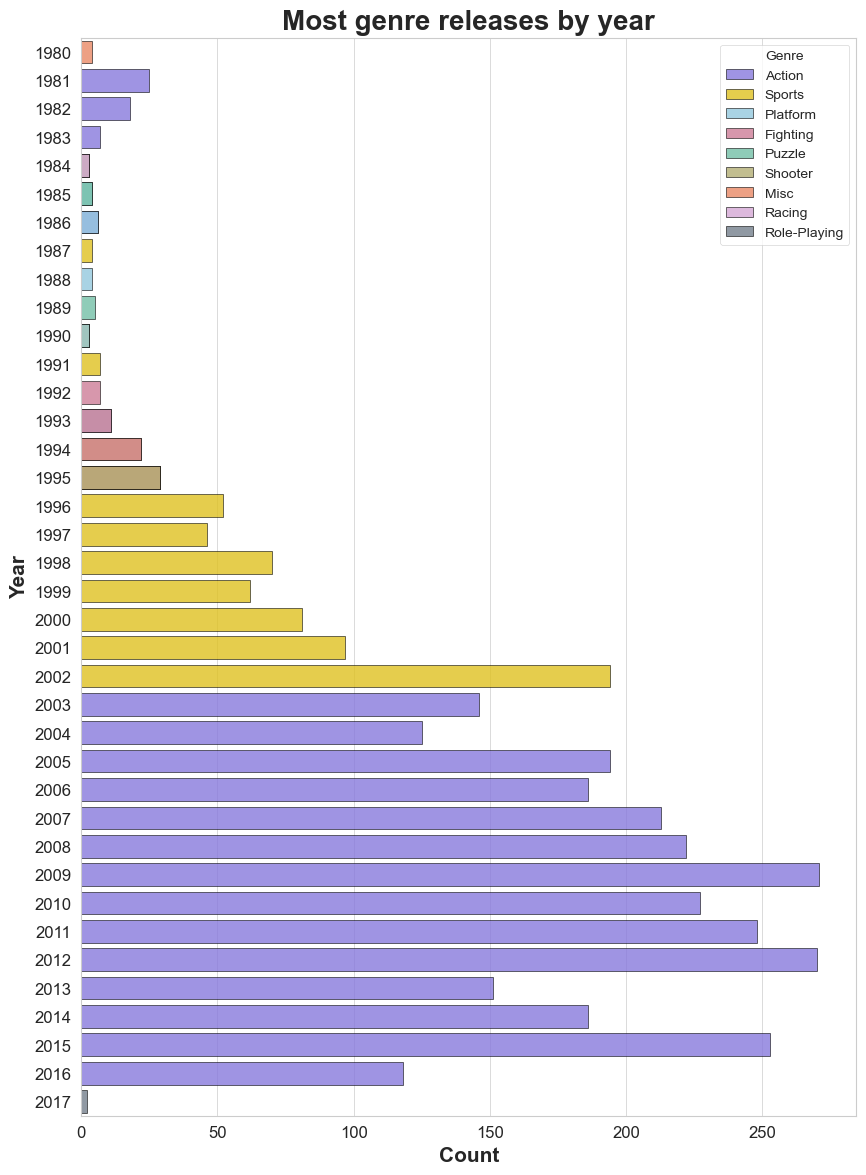

In [56]:
sns.set_style('whitegrid')
plt.figure(figsize = (10, 14))
colors = ['#7B68EE']
sns.set_palette(sns.color_palette(colors))
sns.barplot(data = Y_M_G, x = 'Count', y = 'Year', hue = 'Genre', hue_order = ['Action'], orient = 'h', edgecolor = 'black', alpha = 0.8)
colors = ['#FFD700']
sns.set_palette(sns.color_palette(colors))
sns.barplot(data = Y_M_G, x = 'Count', y = 'Year', hue = 'Genre', hue_order = ['Sports'], orient = 'h', edgecolor = 'black', alpha = 0.8)
colors = ['#87CEEB']
sns.set_palette(sns.color_palette(colors))
sns.barplot(data = Y_M_G, x = 'Count', y = 'Year', hue = 'Genre', hue_order = ['Platform'], orient = 'h', edgecolor = 'black', alpha = 0.8)
colors = ['#DB7093']
sns.set_palette(sns.color_palette(colors))
sns.barplot(data = Y_M_G, x = 'Count', y = 'Year', hue = 'Genre', hue_order = ['Fighting'], orient = 'h', edgecolor = 'black', alpha = 0.8)
colors = ['#66CDAA']
sns.set_palette(sns.color_palette(colors))
sns.barplot(data = Y_M_G, x = 'Count', y = 'Year', hue = 'Genre', hue_order = ['Puzzle'], orient = 'h', edgecolor = 'black', alpha = 0.8)
colors = ['#BDB76B']
sns.set_palette(sns.color_palette(colors))
sns.barplot(data = Y_M_G, x = 'Count', y = 'Year', hue = 'Genre', hue_order = ['Shooter'], orient = 'h', edgecolor = 'black', alpha = 0.8)
colors = ['#FF7F50']
sns.set_palette(sns.color_palette(colors))
sns.barplot(data = Y_M_G, x = 'Count', y = 'Year', hue = 'Genre', hue_order = ['Misc'], orient = 'h', edgecolor = 'black', alpha = 0.8)
colors = ['#DDA0DD']
sns.set_palette(sns.color_palette(colors))
sns.barplot(data = Y_M_G, x = 'Count', y = 'Year', hue = 'Genre', hue_order = ['Racing'], orient = 'h', edgecolor = 'black', alpha = 0.8)
colors = ['#708090']
sns.set_palette(sns.color_palette(colors))
sns.barplot(data = Y_M_G, x = 'Count', y = 'Year', hue = 'Genre', hue_order = ['Role-Playing'], orient = 'h', edgecolor = 'black', alpha = 0.8)

plt.title('Most genre releases by year', fontweight = 'bold', fontsize = 20)
plt.xlabel('Count', fontsize = 15, fontweight = 'bold')
plt.ylabel('Year', fontsize = 15, fontweight = 'bold')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

## 2016까지 가장 최고 트랜드는 Action이라는것을 알수있었다. 위에서 지역별로 나눴을 때에도 Action이 가장 많이 팔린것으로 보였는데 출시도 많이했다.

## (1-1) 이제 연도별로 전체매출까지 포함한 가장 트랜디했던 장르들을 파헤쳐 보고자 합니다.

In [57]:
df['Global_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

In [58]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [59]:
Y_G_GS = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()
Y_G_GS_bool = Y_G_GS.groupby(['Year'])['Global_Sales'].transform(max) == Y_G_GS['Global_Sales']
Y_G_GS = Y_G_GS[Y_G_GS_bool].reset_index(drop=True)
Y_G_GS.Genre.value_counts()

Action          16
Platform         8
Sports           4
Role-Playing     3
Shooter          2
Puzzle           2
Fighting         2
Racing           1
Name: Genre, dtype: int64

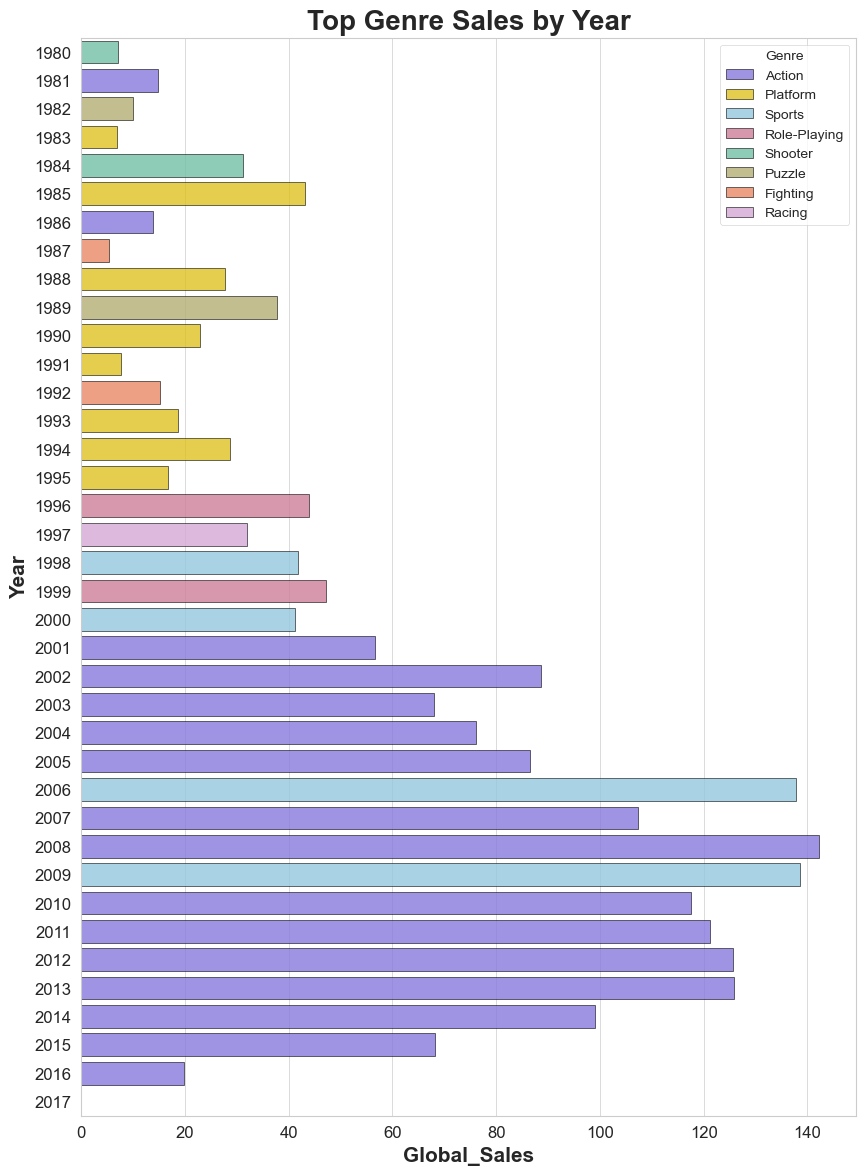

In [60]:
sns.set_style('whitegrid')
plt.figure(figsize = (10, 14))
colors = ['#7B68EE']
sns.set_palette(sns.color_palette(colors))
sns.barplot(data = Y_G_GS, x = 'Global_Sales', y = 'Year', hue = 'Genre', hue_order = ['Action'], orient = 'h', edgecolor = 'black', alpha = 0.8)
colors = ['#FFD700']
sns.set_palette(sns.color_palette(colors))
sns.barplot(data = Y_G_GS, x = 'Global_Sales', y = 'Year', hue = 'Genre', hue_order = ['Platform'], orient = 'h', edgecolor = 'black', alpha = 0.8)
colors = ['#87CEEB']
sns.set_palette(sns.color_palette(colors))
sns.barplot(data = Y_G_GS, x = 'Global_Sales', y = 'Year', hue = 'Genre', hue_order = ['Sports'], orient = 'h', edgecolor = 'black', alpha = 0.8)
colors = ['#DB7093']
sns.set_palette(sns.color_palette(colors))
sns.barplot(data = Y_G_GS, x = 'Global_Sales', y = 'Year', hue = 'Genre', hue_order = ['Role-Playing'], orient = 'h', edgecolor = 'black', alpha = 0.8)
colors = ['#66CDAA']
sns.set_palette(sns.color_palette(colors))
sns.barplot(data = Y_G_GS, x = 'Global_Sales', y = 'Year', hue = 'Genre', hue_order = ['Shooter'], orient = 'h', edgecolor = 'black', alpha = 0.8)
colors = ['#BDB76B']
sns.set_palette(sns.color_palette(colors))
sns.barplot(data = Y_G_GS, x = 'Global_Sales', y = 'Year', hue = 'Genre', hue_order = ['Puzzle'], orient = 'h', edgecolor = 'black', alpha = 0.8)
colors = ['#FF7F50']
sns.set_palette(sns.color_palette(colors))
sns.barplot(data = Y_G_GS, x = 'Global_Sales', y = 'Year', hue = 'Genre', hue_order = ['Fighting'], orient = 'h', edgecolor = 'black', alpha = 0.8)
colors = ['#DDA0DD']
sns.set_palette(sns.color_palette(colors))
sns.barplot(data = Y_G_GS, x = 'Global_Sales', y = 'Year', hue = 'Genre', hue_order = ['Racing'], orient = 'h', edgecolor = 'black', alpha = 0.8)

plt.title('Top Genre Sales by Year', fontweight = 'bold', fontsize = 20)
plt.xlabel('Global_Sales', fontsize = 15, fontweight = 'bold')
plt.ylabel('Year', fontsize = 15, fontweight = 'bold')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

## 출고량에 따라서 연도별 장르가 조금은 변하지만 Action의 입지는 완고하다.
## 2017년의 경우 하나의 데이터밖에 없어서 표시도 안되었다... 초창기니까!

## (2) 이번엔 연도별 플랫폼을 비교하기로 했다.

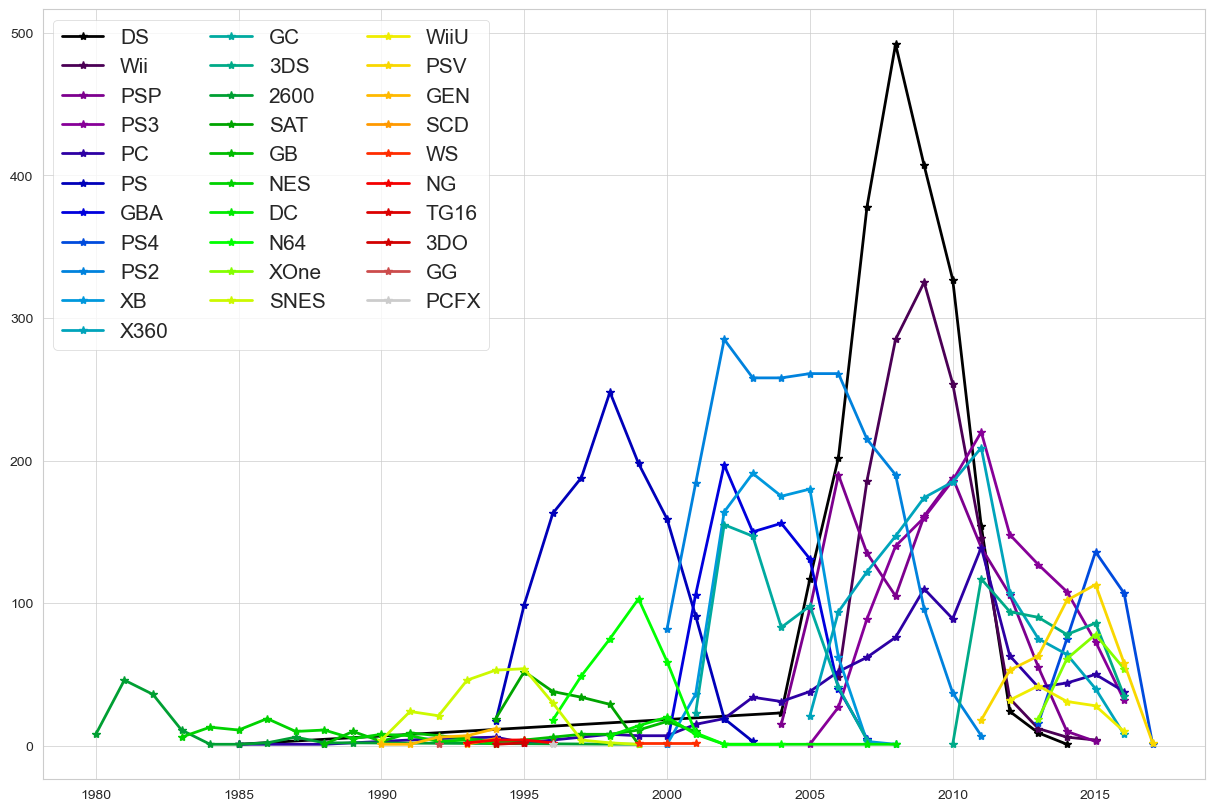

In [61]:
Platform = df.Platform.unique()
colors = plt.cm.nipy_spectral(np.linspace(0, 1, len(Platform)))

plt.figure(figsize = (15, 10))

for i, c in zip(Platform, colors):
    platform_filter = df.Platform == i
    platform_data = df.loc[platform_filter]
    platform_grouped = platform_data.groupby(['Year', 'Platform']).size().reset_index(name = 'Count')
    plt.plot(platform_grouped['Year'], platform_grouped['Count'], marker = '*', label = i, color = c)

plt.legend(fontsize = 15, ncol = 3)
plt.show()

### 한눈에 봐도 지저분하다는걸 알수 있었다. 뭐가 뭔지 구분도 안된다.

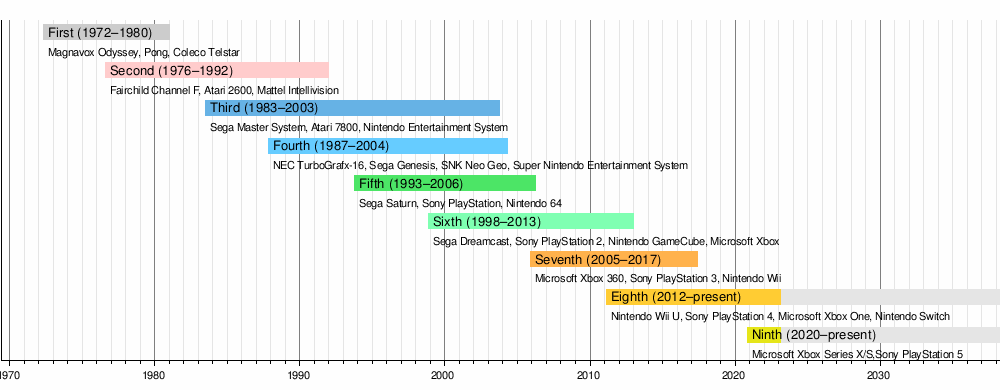
### 출처 : https://en.wikipedia.org/wiki/Video_game_console
### 연도별 플랫폼이 31종류나 되기에 세대별로 나눠서 구분하기로 결정했다.

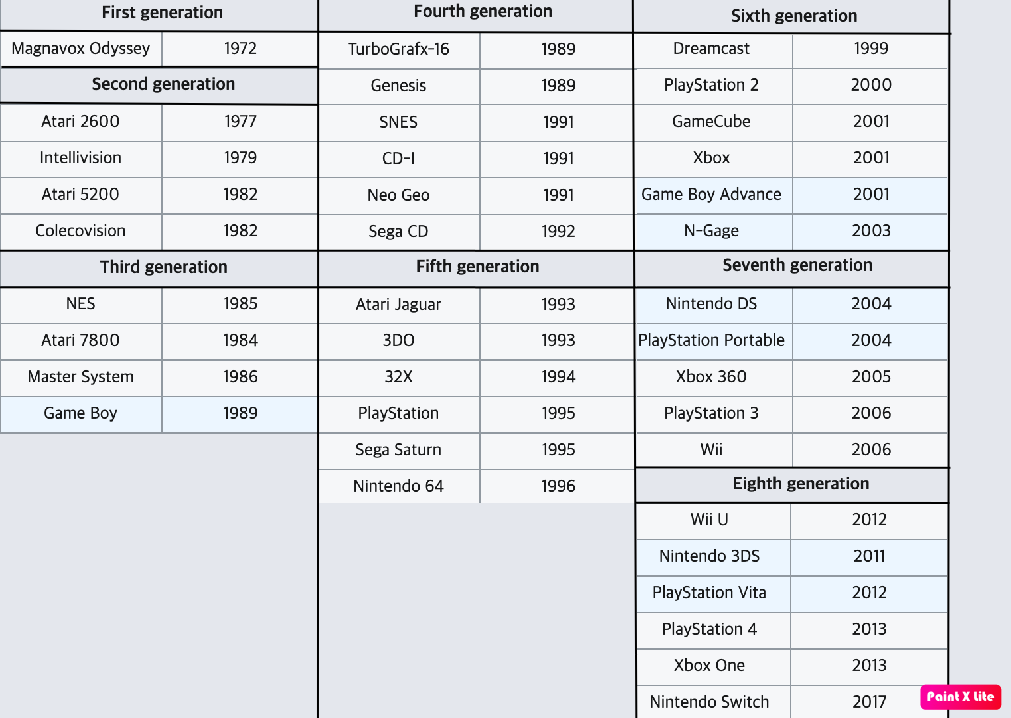

### 2세대 : 2600 3세대 : GB, NES 4세대 : TG16, GEN, SNES, NG, SCD, GG
### 5세대 : 3DO, PS, SAT, N64, PCFX 6세대 : DC, PS2, GC, GBA, XB, WS 
### 7세대 : DS, PSP, X360, PS3, Wii 8세대 : WiiU, 3DS, PSV, PS4, XOne
### PC : PC | PC의 경우 세대로 구분하기가 어려워보여 따로 구분하기로 결정

In [62]:
Generation_df = pd.DataFrame({
    '세대': ['2세대', '3세대', '4세대', '5세대', '6세대', '7세대', '8세대', 'PC'],
    '대표적인 게임기': ['2600', 'GB, NES', 'TG16, GEN, SNES, NG, SCD, GG', '3DO, PS, SAT, N64, PCFX', 'DC, PS2, GC, GBA, XB, WS', 'DS, PSP, X360, PS3, Wii', 'WiiU, 3DS, PSV, PS4, XOne', 'PC']
})

print(Generation_df)

    세대                      대표적인 게임기
0  2세대                          2600
1  3세대                       GB, NES
2  4세대  TG16, GEN, SNES, NG, SCD, GG
3  5세대       3DO, PS, SAT, N64, PCFX
4  6세대      DC, PS2, GC, GBA, XB, WS
5  7세대       DS, PSP, X360, PS3, Wii
6  8세대     WiiU, 3DS, PSV, PS4, XOne
7   PC                            PC


In [63]:
Platform

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [64]:
def add_generation(Platform):
    if Platform == '2600':
        return '2'
    elif Platform in ['GB', 'NES']:
        return '3'
    elif Platform in ['TG16', 'GEN', 'SNES', 'NG', 'SCD', 'GG']:
        return '4'
    elif Platform in ['3DO', 'PS', 'SAT', 'N64', 'PCFX']:
        return '5'
    elif Platform in ['DC', 'PS2', 'GC', 'GBA', 'XB', 'WS']:
        return '6'
    elif Platform in ['DS', 'PSP', 'X360', 'PS3', 'Wii']:
        return '7'
    elif Platform in ['WiiU', '3DS', 'PSV', 'PS4', 'XOne']:
        return '8'
    elif Platform == 'PC':
        return 'PC'
    else:
        return None
    
df['Generation'] = df['Platform'].apply(add_generation)

In [65]:
df.loc[df['Generation'] == '2', 'Year']

37       1984
210      1982
664      1981
820      1981
877      1981
         ... 
16262    1981
16274    1999
16316    1982
16362    1983
16471    1981
Name: Year, Length: 116, dtype: int64

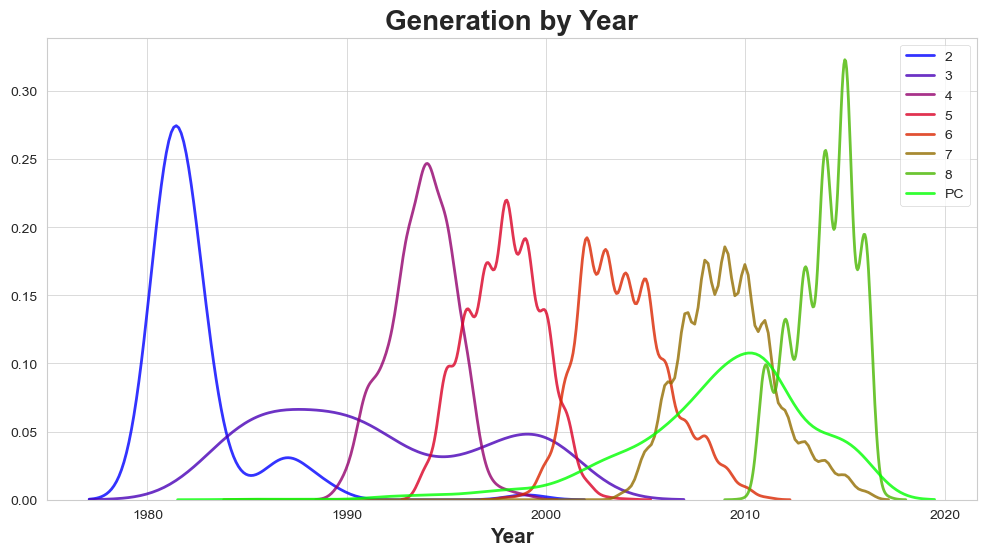

In [66]:
Generation = df['Generation'].unique()
Generation = np.sort(Generation)
colorsg = plt.cm.brg(np.linspace(0, 1, len(Generation)))
plt.figure(figsize = (12, 6))
for i, j in zip(Generation, colorsg):
    sns.kdeplot(df.loc[df['Generation'] == i, 'Year'], label = i, color = j, alpha = 0.8)
plt.xlabel('Year', fontsize = 15, fontweight = 'bold')
plt.ylabel('')
plt.title('Generation by Year', fontsize = 20, fontweight = 'bold')
plt.legend()
plt.show()

### 연도마다 플랫폼세대별로 바뀌고있다. 플랫폼으로서의 PC는 세대로 나눌수가 없다 생각했다.
### 2세대부터 지금 현재까지도 PC는 사용되고있기 때문이다.

### 이번엔 매출까지 넣어서 확인해보기로 결정했다.

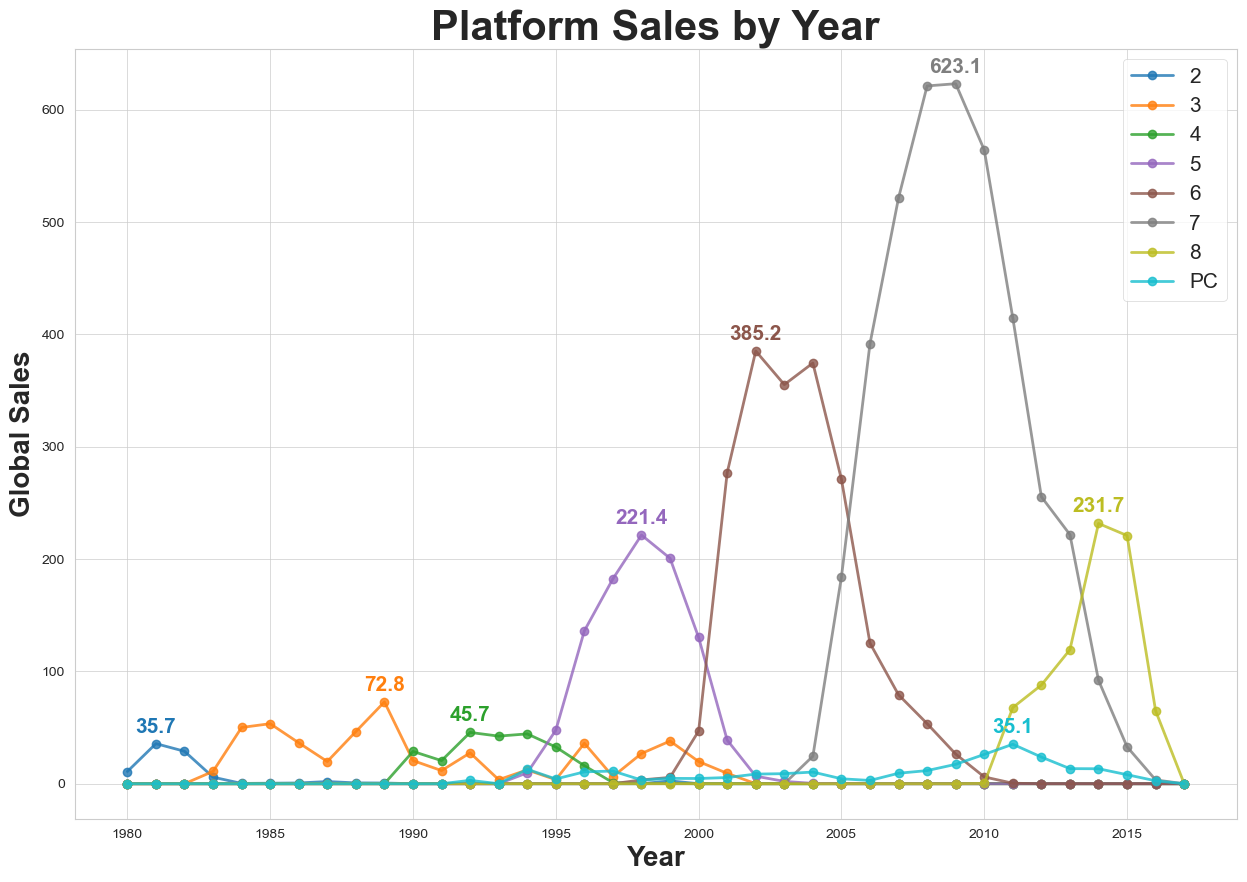

In [67]:
df_test = df.iloc[:, [2, 9, 10]]
df_test1 = pd.pivot_table(data = df_test, index = 'Year', columns = 'Generation', values = 'Global_Sales', aggfunc = 'sum', fill_value = 0)
test1_col = df_test1.columns
colors = plt.cm.tab10(np.linspace(0, 1, len(test1_col)))

plt.figure(figsize = (15, 10))

for i, c in zip(test1_col, colors):
    plt.plot(df_test1.index, df_test1[i], label = i, color = c, alpha = 0.8, marker = 'o')
    if df_test1[i].max() > 0:
        plt.text(x = df_test1[i].idxmax(), y = df_test1[i].max() + 10, s = round(df_test1[i].max(), 1), ha = 'center', color = c, size = 15, fontweight = 'bold')
plt.title('Platform Sales by Year', fontsize = 30, fontweight = 'bold')
plt.xlabel('Year', fontsize = 20, fontweight = 'bold')
plt.ylabel('Global Sales', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize = 15)
plt.show()

## 연도에 따라 플랫폼세대가 변한다는것을 알 수 있었습니다.
## 다음 분기 게임을 계획하기에 확실하게 느낀것은 과거플랫폼보다는 새로운세대의 플랫폼을 사용해야 한다고 느꼈습니다.

## (3) 혹시 몰라 배급사별 매출량도 확인해보려고 한다.
### 배급사를 확인해본 결과 너무 많은 배급사가 있어서 연도를 10년단위로 끊어서 나타내기로 결정

In [68]:
df_P = df.iloc[:, [2, 4, 9]]
df_P.head()

,Year,Publisher,Global_Sales
0,2008,Destineer,0.04
1,2009,Namco Bandai Games,0.18
2,2010,Alchemist,0.02
3,2010,Zoo Games,0.04
4,2010,D3Publisher,0.25


In [69]:
df_PG1 = df_P.loc[df_P['Year'] < 1991]
df_PG2 = df_P.loc[(df_P['Year'] >= 1991) & (df_P['Year'] < 2001)]
df_PG3 = df_P.loc[(df_P['Year'] >= 2001) & (df_P['Year'] < 2011)]
df_PG4 = df_P.loc[(df_P['Year'] >= 2011)]

In [70]:
Publisher_1 = df_PG1['Publisher'].value_counts()
Publisher_2 = df_PG2['Publisher'].value_counts()
Publisher_3 = df_PG3['Publisher'].value_counts()
Publisher_4 = df_PG4['Publisher'].value_counts()

In [71]:
Publisher_1

Nintendo                        54
Atari                           42
Activision                      25
Namco Bandai Games              14
Capcom                          11
Mattel Interactive               8
Parker Bros.                     7
Konami Digital Entertainment     7
Hudson Soft                      6
Coleco                           5
20th Century Fox Video Games     5
Imagic                           4
SquareSoft                       4
Enix Corporation                 3
Tigervision                      3
Data Age                         2
Sega                             2
Starpath Corp.                   1
Quelle                           1
Men-A-Vision                     1
Unknown                          1
Maxis                            1
Mycom                            1
Wizard Video Games               1
Universal Gamex                  1
Answer Software                  1
HAL Laboratory                   1
Avalon Interactive               1
CBS Electronics     

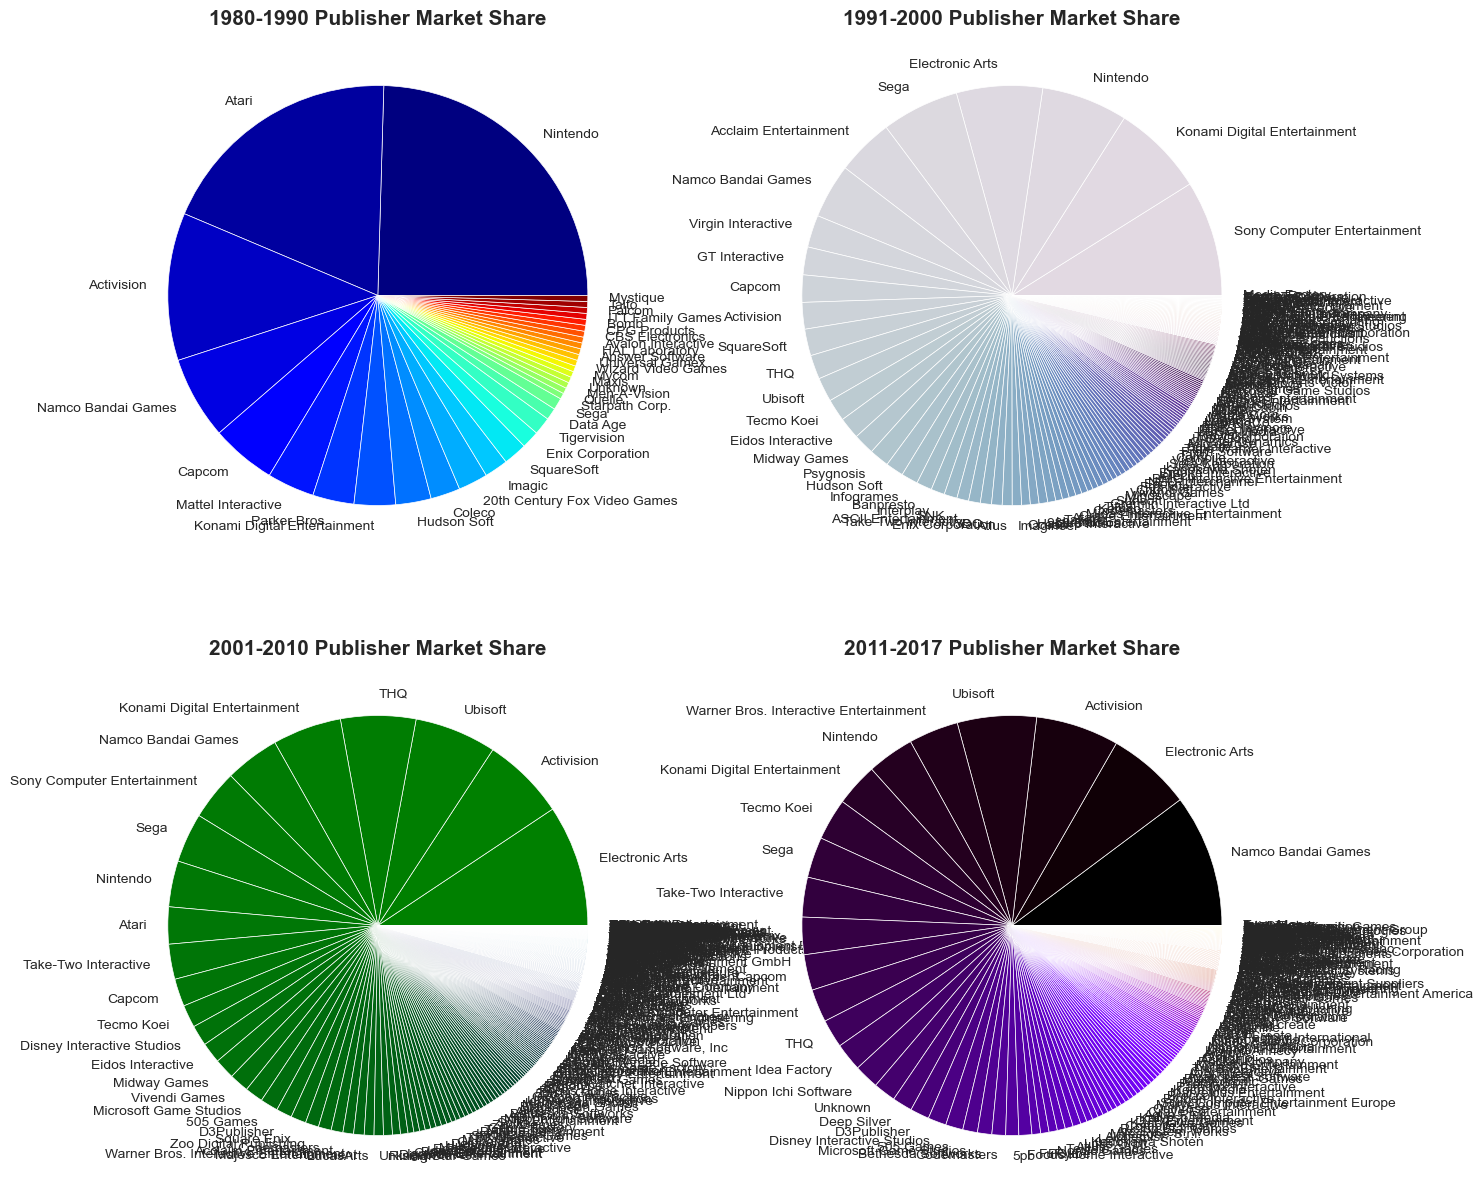

In [72]:
colors = plt.cm.jet(np.linspace(0, 1, len(Publisher_1)))
plt.figure(figsize = (15, 15))
plt.subplot(2, 2, 1)
plt.pie(Publisher_1, labels = Publisher_1.index, colors = colors)
plt.title('1980-1990 Publisher Market Share', fontsize = 15, fontweight = 'bold')
colors = plt.cm.twilight(np.linspace(0, 1, len(Publisher_2)))
plt.subplot(2, 2, 2)
plt.pie(Publisher_2, labels = Publisher_2.index, colors = colors)
plt.title('1991-2000 Publisher Market Share', fontsize = 15, fontweight = 'bold')
colors = plt.cm.ocean(np.linspace(0, 1, len(Publisher_3)))
plt.subplot(2, 2, 3)
plt.pie(Publisher_3, labels = Publisher_3.index, colors = colors)
plt.title('2001-2010 Publisher Market Share', fontsize = 15, fontweight = 'bold')
colors = plt.cm.gnuplot(np.linspace(0, 1, len(Publisher_4)))
plt.subplot(2, 2, 4)
plt.pie(Publisher_4, labels = Publisher_4.index, colors = colors)
plt.title('2011-2017 Publisher Market Share', fontsize = 15, fontweight = 'bold')
plt.show()

## 말도 안되게 지저분하다.. 연도별 10개씩으로 줄여보기로 결정했다.

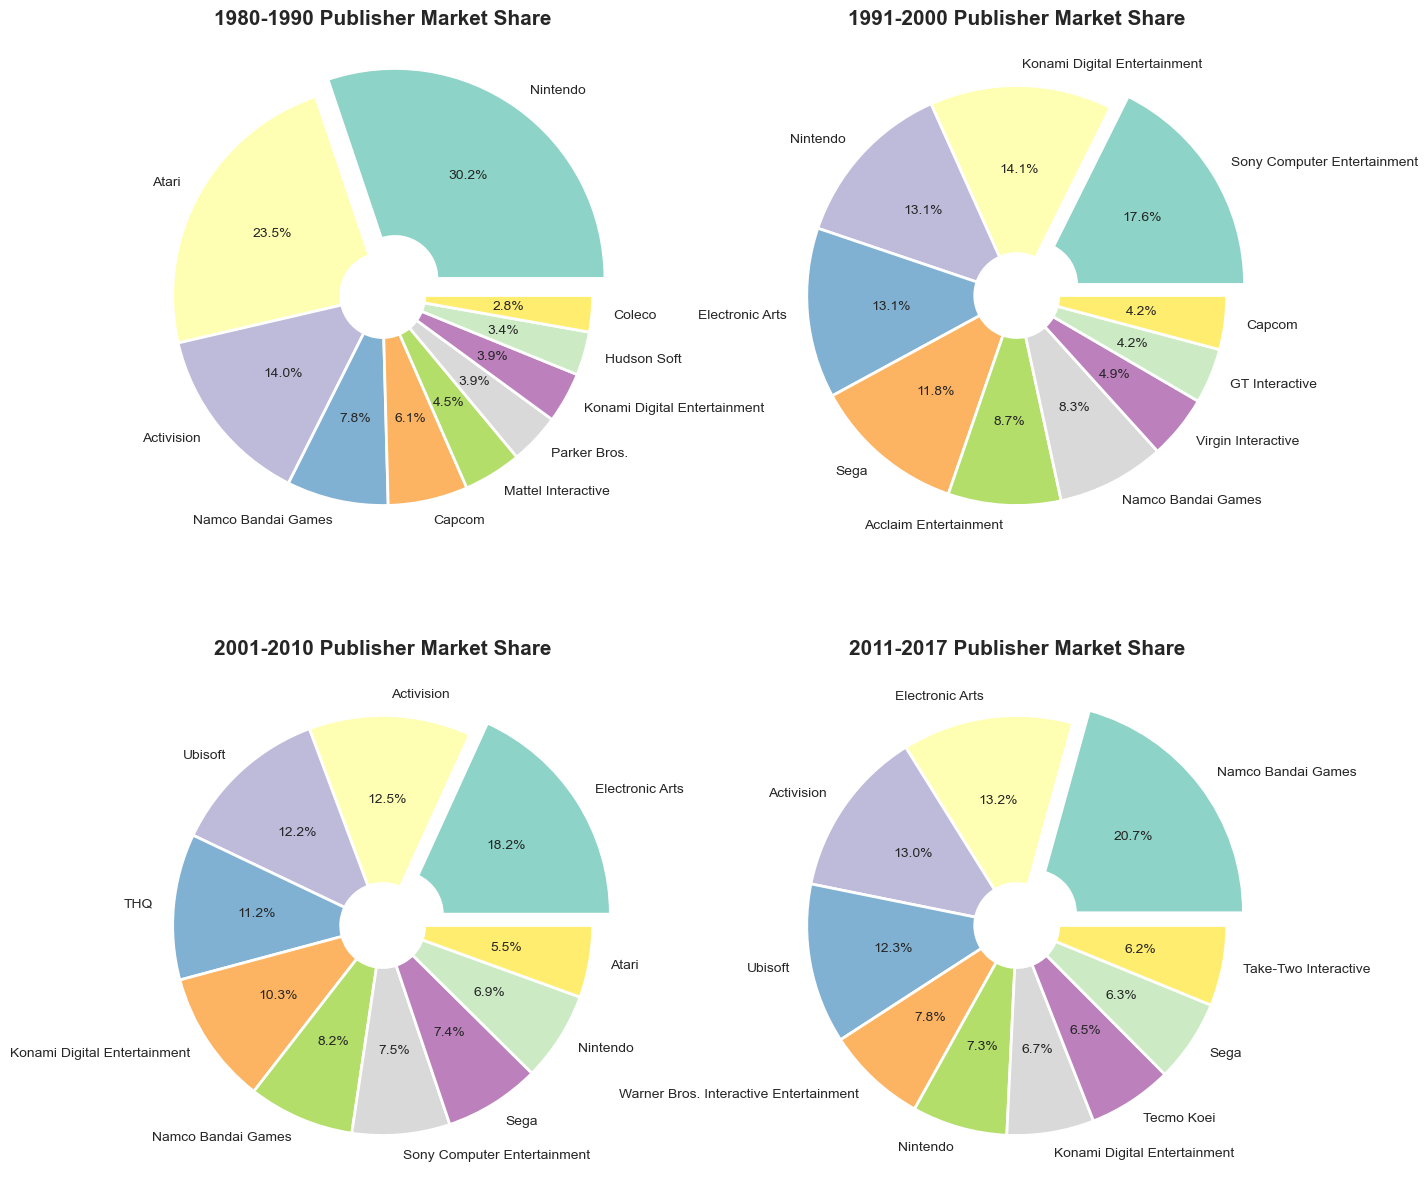

In [73]:
Publisher_1 = Publisher_1[:10]
Publisher_2 = Publisher_2[:10]
Publisher_3 = Publisher_3[:10]
Publisher_4 = Publisher_4[:10]

colors = plt.cm.Set3(np.linspace(0, 1, len(Publisher_1)))
plt.figure(figsize = (15, 15))
wedgeprops = {'width': 0.8, 'edgecolor': 'w', 'linewidth': 2}
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.subplot(2, 2, 1)
plt.pie(Publisher_1, labels = Publisher_1.index, colors = colors, autopct='%.1f%%', wedgeprops = wedgeprops, explode = explode)
plt.title('1980-1990 Publisher Market Share', fontsize = 15, fontweight = 'bold')
plt.subplot(2, 2, 2)
plt.pie(Publisher_2, labels = Publisher_2.index, colors = colors, autopct='%.1f%%', wedgeprops = wedgeprops, explode = explode)
plt.title('1991-2000 Publisher Market Share', fontsize = 15, fontweight = 'bold')
plt.subplot(2, 2, 3)
plt.pie(Publisher_3, labels = Publisher_3.index, colors = colors, autopct='%.1f%%', wedgeprops = wedgeprops, explode = explode)
plt.title('2001-2010 Publisher Market Share', fontsize = 15, fontweight = 'bold')
plt.subplot(2, 2, 4)
plt.pie(Publisher_4, labels = Publisher_4.index, colors = colors, autopct='%.1f%%', wedgeprops = wedgeprops, explode = explode)
plt.title('2011-2017 Publisher Market Share', fontsize = 15, fontweight = 'bold')
plt.show()

## 1980-1990 : Nintendo 1991-2000 : Sony Computer Entertainment
## 2000-2010 : Electronic Arts 2011-2017 : Namco Bandal Games 순으로 나왔다.
## 마켓점유율만 확인했으니 이제 매출과 엮어서 확인해보도록하겠다.

In [74]:
gdf_PG1 = df_PG1.groupby('Publisher').sum()['Global_Sales']
gdf_PG2 = df_PG2.groupby('Publisher').sum()['Global_Sales']
gdf_PG3 = df_PG3.groupby('Publisher').sum()['Global_Sales']
gdf_PG4 = df_PG4.groupby('Publisher').sum()['Global_Sales']

In [75]:
gdf_PG1 = gdf_PG1.nlargest(10)
gdf_PG2 = gdf_PG2.nlargest(10)
gdf_PG3 = gdf_PG3.nlargest(10)
gdf_PG4 = gdf_PG4.nlargest(10)

In [76]:
gdf_PG4

Publisher
Electronic Arts                           279.68
Activision                                231.01
Nintendo                                  225.67
Ubisoft                                   177.24
Take-Two Interactive                      140.21
Warner Bros. Interactive Entertainment    105.49
Sony Computer Entertainment                87.06
Namco Bandai Games                         78.93
Microsoft Game Studios                     74.71
Square Enix                                59.78
Name: Global_Sales, dtype: float64

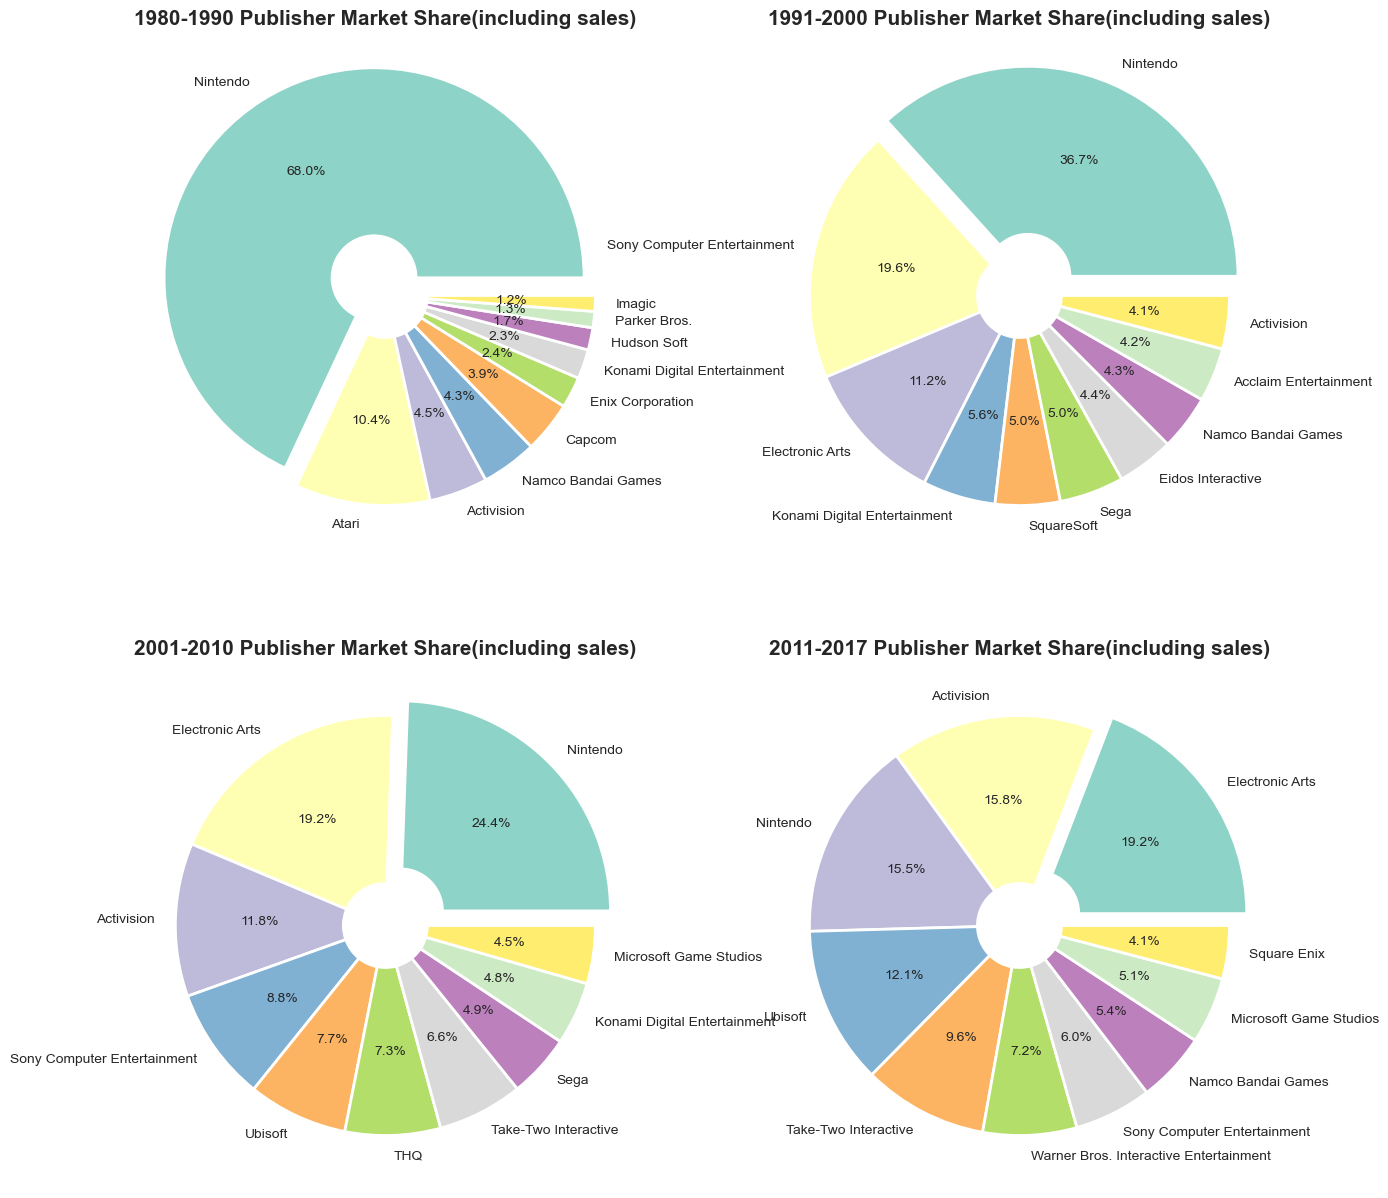

In [77]:
colors = plt.cm.Set3(np.linspace(0, 1, len(Publisher_1)))
plt.figure(figsize = (15, 15))
wedgeprops = {'width': 0.8, 'edgecolor': 'w', 'linewidth': 2}
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.subplot(2, 2, 1)
plt.pie(gdf_PG1, labels = gdf_PG1.index, colors = colors, autopct='%.1f%%', wedgeprops = wedgeprops, explode = explode)
plt.title('1980-1990 Publisher Market Share(including sales)', fontsize = 15, fontweight = 'bold')
plt.subplot(2, 2, 2)
plt.pie(gdf_PG2, labels = gdf_PG2.index, colors = colors, autopct='%.1f%%', wedgeprops = wedgeprops, explode = explode)
plt.title('1991-2000 Publisher Market Share(including sales)', fontsize = 15, fontweight = 'bold')
plt.subplot(2, 2, 3)
plt.pie(gdf_PG3, labels = gdf_PG3.index, colors = colors, autopct='%.1f%%', wedgeprops = wedgeprops, explode = explode)
plt.title('2001-2010 Publisher Market Share(including sales)', fontsize = 15, fontweight = 'bold')
plt.subplot(2, 2, 4)
plt.pie(gdf_PG4, labels = gdf_PG4.index, colors = colors, autopct='%.1f%%', wedgeprops = wedgeprops, explode = explode)
plt.title('2011-2017 Publisher Market Share(including sales)', fontsize = 15, fontweight = 'bold')
plt.show()

## 매출량으로 비교해보니 2010년까지는 Nintendo의 독무대였다..
## 2011-2017년이 되서야 Nintendo를 앞지르고 Electronic Arts가 4%정도 앞서가고 있다.

## 연도별 트렌드는 존재한다!

# 3. 인기가 많은 게임에 대한 분석 및 시각화 프로세스

## 이제부터는 결론을 도출해보려 하기에 너무 오래된 연도와 플랫폼은 제외하고 진행해보기로 결정했다.

In [78]:
df_final = df.loc[df.Year > 2010]
df_final.reset_index(drop = True, inplace = True)

In [79]:
df_final

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Generation
0,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03,PC
1,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01,0.08,7
2,Hajime no Ippo: The Fighting! (2014),PS3,2014,Sports,Namco Bandai Games,0.00,0.00,0.03,0.00,0.03,7
3,Grand Kingdom,PS4,2015,Role-Playing,Nippon Ichi Software,0.02,0.00,0.03,0.00,0.05,8
4,Don Bradman Cricket 14,X360,2014,Sports,Tru Blu Entertainment,0.00,0.01,0.00,0.00,0.01,7
...,...,...,...,...,...,...,...,...,...,...,...
3889,Captain Morgane and the Golden Turtle,DS,2012,Adventure,Reef Entertainment,0.00,0.03,0.00,0.00,0.03,7
3890,LEGO The Hobbit,XOne,2014,Action,Warner Bros. Interactive Entertainment,0.13,0.12,0.00,0.02,0.27,8
3891,MindJack,PS3,2011,Shooter,Square Enix,0.07,0.08,0.00,0.03,0.18,7
3892,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,7


## 매출량을 계산할 때 지금까지는 Global_Sales의 합계량만 보고 계산했는데 이번에는 출시된 장르, 플랫폼별 수량과 출고량을 평균을 내어서 최고출고량만 시각화를 해보기로 했다.

In [80]:
my_test = pd.DataFrame(df_final.groupby(['Platform', 'Genre']).mean()['NA_Sales'])
my_test1 = pd.DataFrame(df_final.groupby(['Platform', 'Genre']).mean()['EU_Sales'])
my_test2 = pd.DataFrame(df_final.groupby(['Platform', 'Genre']).mean()['JP_Sales'])
my_test3 = pd.DataFrame(df_final.groupby(['Platform', 'Genre']).mean()['Other_Sales'])
my_test = my_test.reset_index(level = 'Genre')
my_test1 = my_test1.reset_index(level = 'Genre')
my_test2 = my_test2.reset_index(level = 'Genre')
my_test3 = my_test3.reset_index(level = 'Genre')

In [81]:
sample1 = my_test.groupby('Platform')['NA_Sales'].transform(max) == my_test['NA_Sales']
testNA = my_test[sample1].reset_index()
sample2 = my_test1.groupby('Platform')['EU_Sales'].transform(max) == my_test1['EU_Sales']
testEU = my_test1[sample2].reset_index()
sample3 = my_test2.groupby('Platform')['JP_Sales'].transform(max) == my_test2['JP_Sales']
testJP = my_test2[sample3].reset_index()
sample4 = my_test3.groupby('Platform')['Other_Sales'].transform(max) == my_test3['Other_Sales']
testOt = my_test3[sample4].reset_index()
testJP = my_test2[~my_test2.index.duplicated()]
testNA = testNA.sort_values('NA_Sales', ascending = False).reset_index(drop = True)
testEU = testEU.sort_values('EU_Sales', ascending = False).reset_index(drop = True)
testJP = testJP.sort_values('JP_Sales', ascending = False).reset_index()
testOt = testOt.sort_values('Other_Sales', ascending = False).reset_index(drop = True)

In [82]:
testJP

,Platform,Genre,JP_Sales
0,3DS,Action,0.121154
1,PS3,Action,0.082304
2,PSP,Action,0.061899
3,PS2,Action,0.060000
4,PSV,Action,0.046312
5,PS4,Action,0.042562
6,Wii,Action,0.026415
7,WiiU,Action,0.016984
8,DS,Action,0.015600
9,X360,Action,0.005921


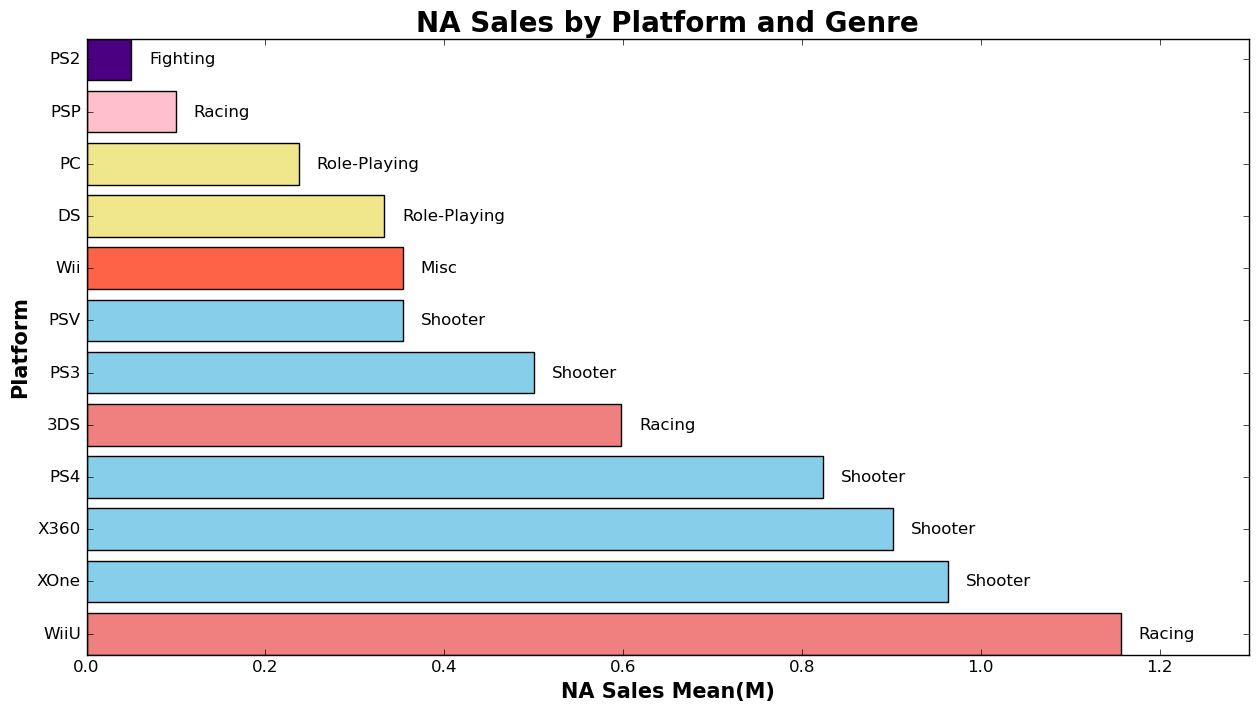

In [83]:
plt.figure(figsize = (15,8))
plt.style.use('classic')
color = ['lightcoral', 'skyblue', 'skyblue', 'skyblue', 'lightcoral', 'skyblue', 'skyblue', 'tomato', 'khaki', 'khaki', 'pink', 'indigo']
plt.barh(testNA.iloc[:,0], testNA.iloc[:,2], color = color)
plt.title('NA Sales by Platform and Genre', fontsize = 20, fontweight = 'bold')
plt.xlabel('NA Sales Mean(M)', fontsize = 15, fontweight = 'bold')
plt.ylabel('Platform', fontsize = 15, fontweight = 'bold')
plt.xlim(0, 1.3)
for i, platform in enumerate(testNA['Platform']):
    plt.text(testNA['NA_Sales'][i] + 0.02, i, testNA['Genre'][i], ha = 'left', va = 'center')

plt.show()

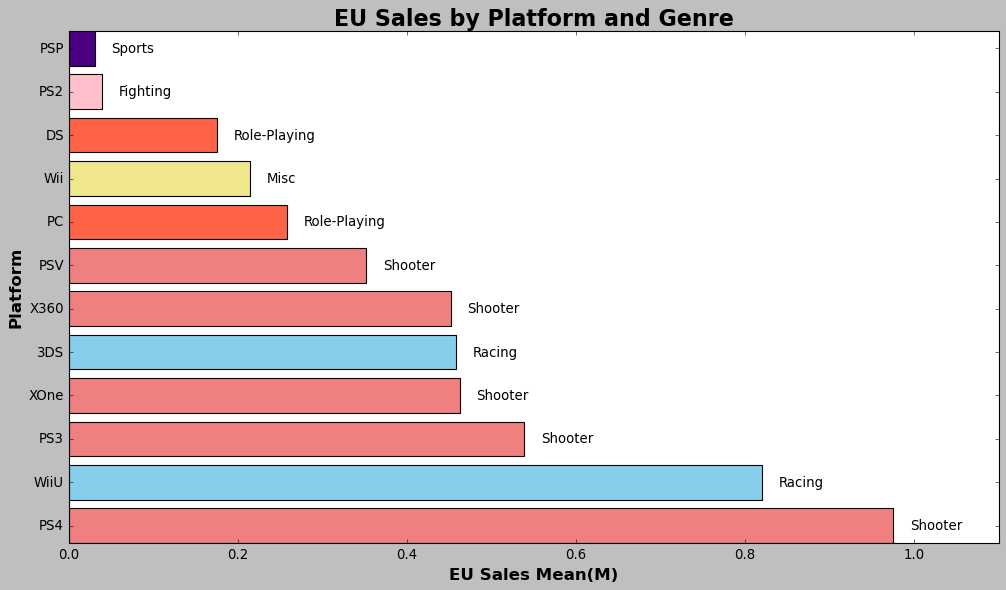

In [84]:
plt.figure(figsize = (15,8))
plt.style.use('classic')
color = ['lightcoral', 'skyblue', 'lightcoral', 'lightcoral', 'skyblue', 'lightcoral', 'lightcoral', 'tomato', 'khaki', 'tomato', 'pink', 'indigo']
plt.barh(testEU.iloc[:,0], testEU.iloc[:,2], color = color)
plt.title('EU Sales by Platform and Genre', fontsize = 20, fontweight = 'bold')
plt.xlabel('EU Sales Mean(M)', fontsize = 15, fontweight = 'bold')
plt.ylabel('Platform', fontsize = 15, fontweight = 'bold')
plt.xlim(0, 1.1)
for i, platform in enumerate(testNA['Platform']):
    plt.text(testEU['EU_Sales'][i] + 0.02, i, testEU['Genre'][i], ha = 'left', va = 'center')

plt.show()

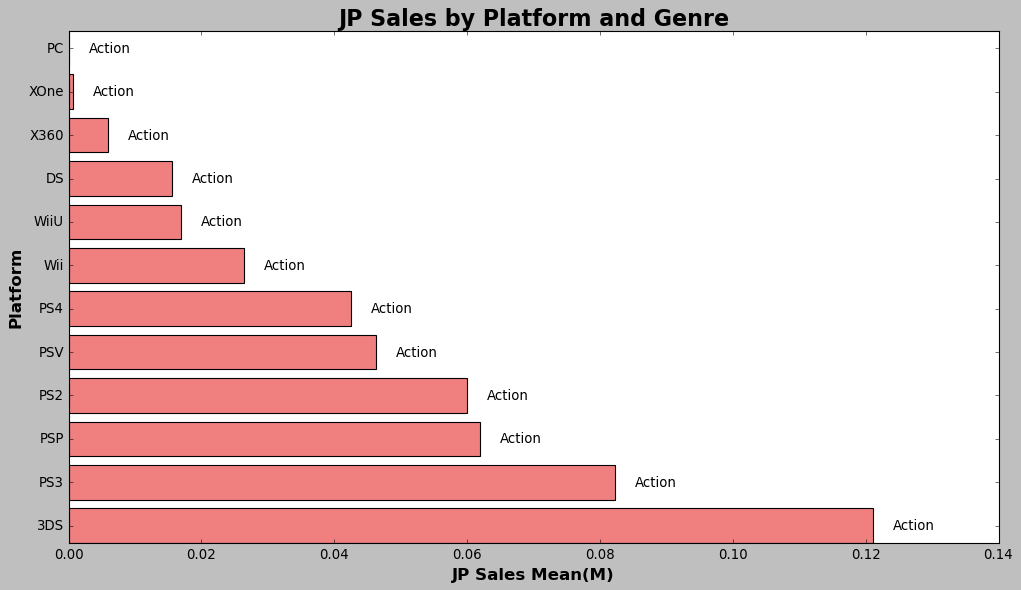

In [85]:
plt.figure(figsize = (15,8))
plt.style.use('classic')
color = ['lightcoral', 'lightcoral', 'lightcoral', 'lightcoral', 'lightcoral', 'lightcoral', 'lightcoral', 'lightcoral', 'lightcoral', 'lightcoral', 'lightcoral', 'lightcoral']
plt.barh(testJP.iloc[:,0], testJP.iloc[:,2], color = color)
plt.title('JP Sales by Platform and Genre', fontsize = 20, fontweight = 'bold')
plt.xlabel('JP Sales Mean(M)', fontsize = 15, fontweight = 'bold')
plt.ylabel('Platform', fontsize = 15, fontweight = 'bold')
for i, platform in enumerate(testJP['Platform']):
    plt.text(testJP['JP_Sales'][i] + 0.003, i, testJP['Genre'][i], ha = 'left', va = 'center')

plt.show()

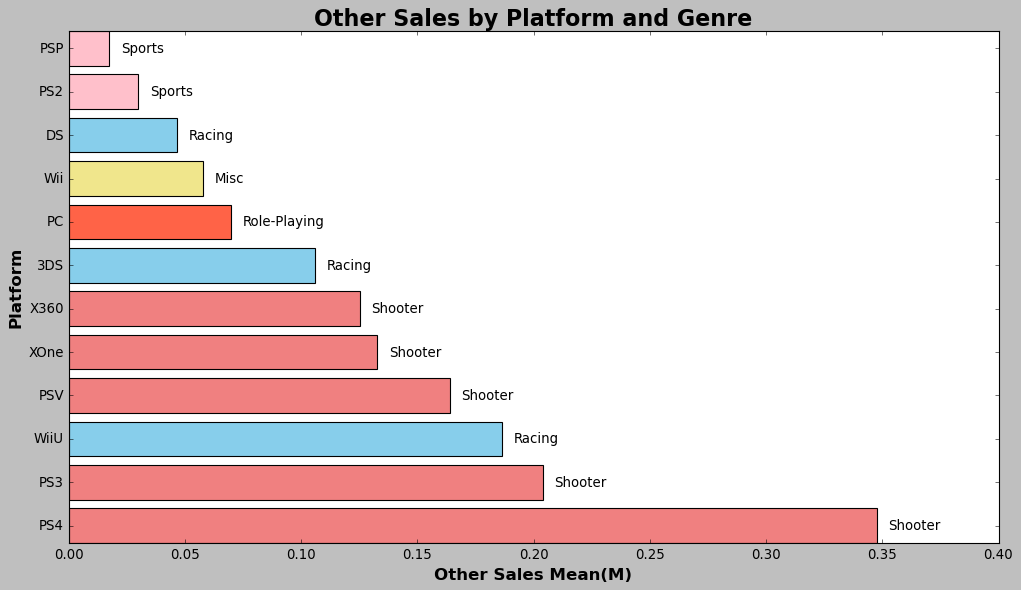

In [86]:
plt.figure(figsize = (15,8))
plt.style.use('classic')
color = ['lightcoral', 'lightcoral', 'skyblue', 'lightcoral', 'lightcoral', 'lightcoral', 'skyblue', 'tomato', 'khaki', 'skyblue', 'pink', 'pink']
plt.barh(testOt.iloc[:,0], testOt.iloc[:,2], color = color)
plt.title('Other Sales by Platform and Genre', fontsize = 20, fontweight = 'bold')
plt.xlabel('Other Sales Mean(M)', fontsize = 15, fontweight = 'bold')
plt.ylabel('Platform', fontsize = 15, fontweight = 'bold')
plt.xlim(0, 0.4)
for i, platform in enumerate(testOt['Platform']):
    plt.text(testOt['Other_Sales'][i] + 0.005, i, testOt['Genre'][i], ha = 'left', va = 'center')

plt.show()

## 인기에 대해서 출고량만 많다고 인기가있다고 하기엔 같은장르로 출시된게임이 많아 보여 플랫폼 장르별 출고량을 평균내어서 해보았더니 결과가 출고량만 높은것과는 확연히 다르게 나왔다.

## 위의 데이터와 종합해서 볼때 출고량이 많은쪽을 하는것도 좋지만 그만큼 출시도 많이 하고있다고 생각되어 타 회사들과는 다르게 생각을 전환하여 틈새시장을 노리는것이 좋다고 생각하였다. 출시량과 장르에 비례해 가장 많이 판매된것들을 종합해보았다.

# 4. 다음 분기에 어떤 게임을 설계해야 하는지에 대한 결론

## 1. 북미 : WiiU X360 을 이용한 Racing or Shooter게임
## 2. 유럽 : PS4 WiiU을 이용한 Racing or Shooter게임
## 3. 일본 : 3DS PS을 이용한 Action 게임
## 4. 기타 : PS4, PS3을 이용한 Shooter게임